In [80]:
import torchvision.transforms.functional as F
import torch.nn as nn

In [48]:
from PIL import Image
import numpy as np
import torch

In [49]:
# Carregar a imagem
image_path = "images/bee.jpg"
image = Image.open(image_path)

# Converter a imagem em um array NumPy
image_np = np.array(image)

# Converter o array NumPy em um tensor do PyTorch
image_tensor = torch.from_numpy(image_np)

print("Tipo do array NumPy:", type(image_np))
print("Tipo do tensor PyTorch:", type(image_tensor))

Tipo do array NumPy: <class 'numpy.ndarray'>
Tipo do tensor PyTorch: <class 'torch.Tensor'>


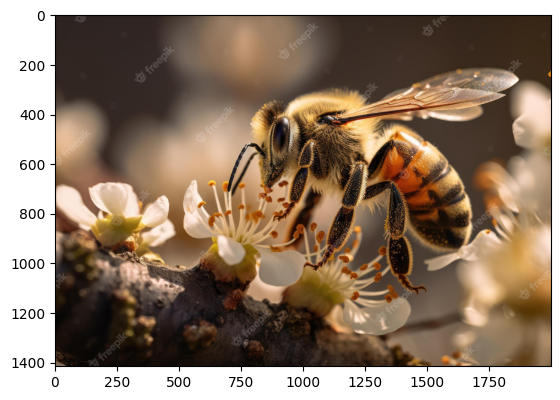

In [50]:
plt.imshow(image_np)

In [55]:
image_tensor = image_tensor.permute(2, 0, 1)

In [76]:
# Definir o tamanho desejado (largura e altura iguais para torná-la quadrada)
desired_size = 64
# Redimensionar a imagem
resized_image = F.resize(image, (desired_size, desired_size))

# Converter a imagem redimensionada em um tensor
resized_tensor = F.to_tensor(resized_image)

print("Tamanho da imagem redimensionada:", resized_tensor.size())

Tamanho da imagem redimensionada: torch.Size([3, 64, 64])


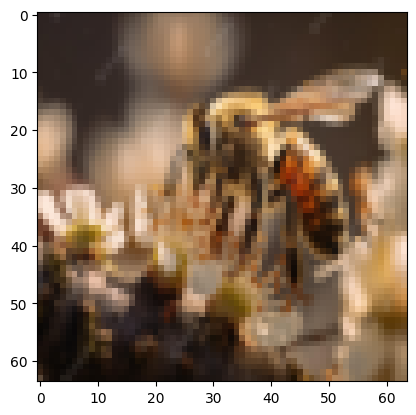

In [77]:
plt.imshow(resized_tensor.permute(1, 2, 0))

In [79]:
resized_tensor.shape

torch.Size([3, 64, 64])

In [91]:
# Separar os canais RGB
red_channel = resized_tensor[0]  # Canal vermelho
green_channel = resized_tensor[1]  # Canal verde
blue_channel = resized_tensor[2]  # Canal azul

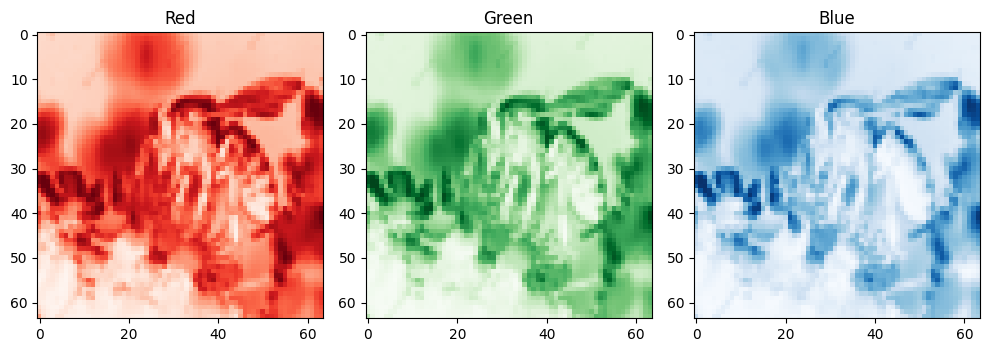

In [99]:
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].set_title('Red')
ax[0].imshow(red_channel.numpy(), cmap="Reds")

ax[1].set_title('Green')
ax[1].imshow(green_channel.numpy(), cmap="Greens")

ax[2].set_title('Blue')
ax[2].imshow(blue_channel.numpy(), cmap="Blues")

fig.tight_layout()
plt.show()

In [161]:
# usando a primeira convolucional
primeira_camada_conv = nn.Conv2d(3, 6, 3)
conv1 = primeira_camada_conv(resized_tensor)

In [162]:
print(f'shape após a 1º conv: {conv1.shape}')

shape após a 1º conv: torch.Size([6, 62, 62])


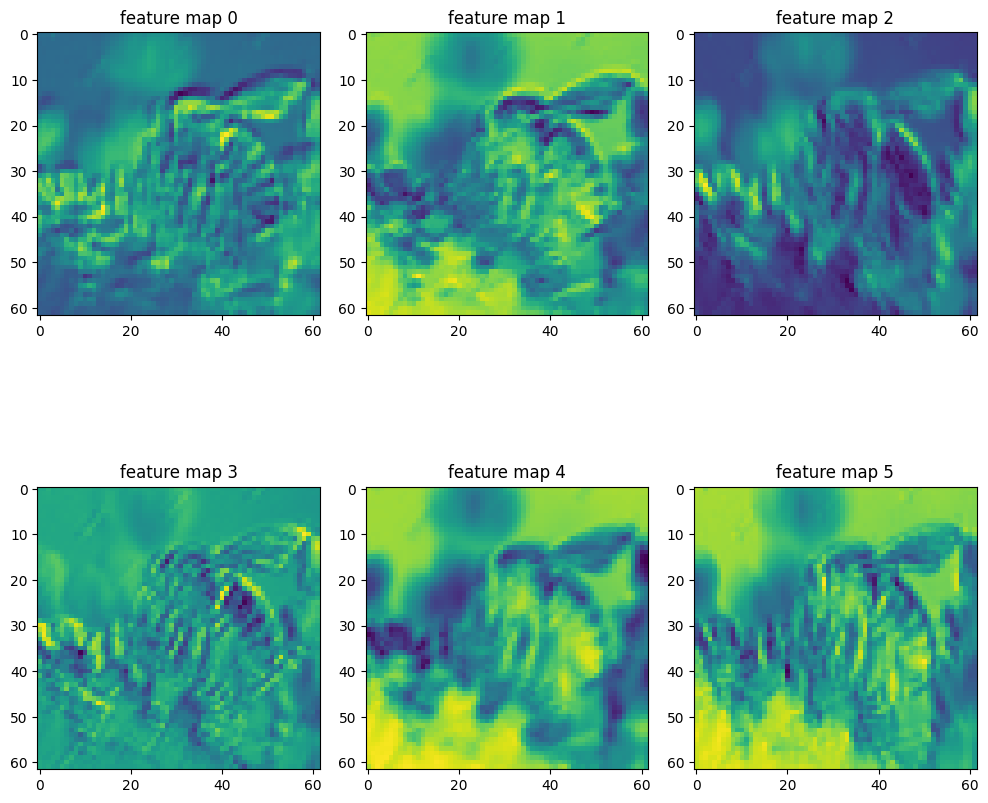

In [163]:
c = 0 
fig, ax = plt.subplots(2,3, figsize=(10,10))

for i in range(2):
    for j in range(3):
        ax[i][j].set_title(f'feature map {c}')
        ax[i][j].imshow(conv1[c].detach().numpy())
        c += 1
fig.tight_layout()
plt.show()

In [164]:
# usando o max pooling
primeiro_pooling = nn.MaxPool2d(2)
pool1 = primeiro_pooling(conv1)

In [138]:
pool1.shape

torch.Size([6, 31, 31])

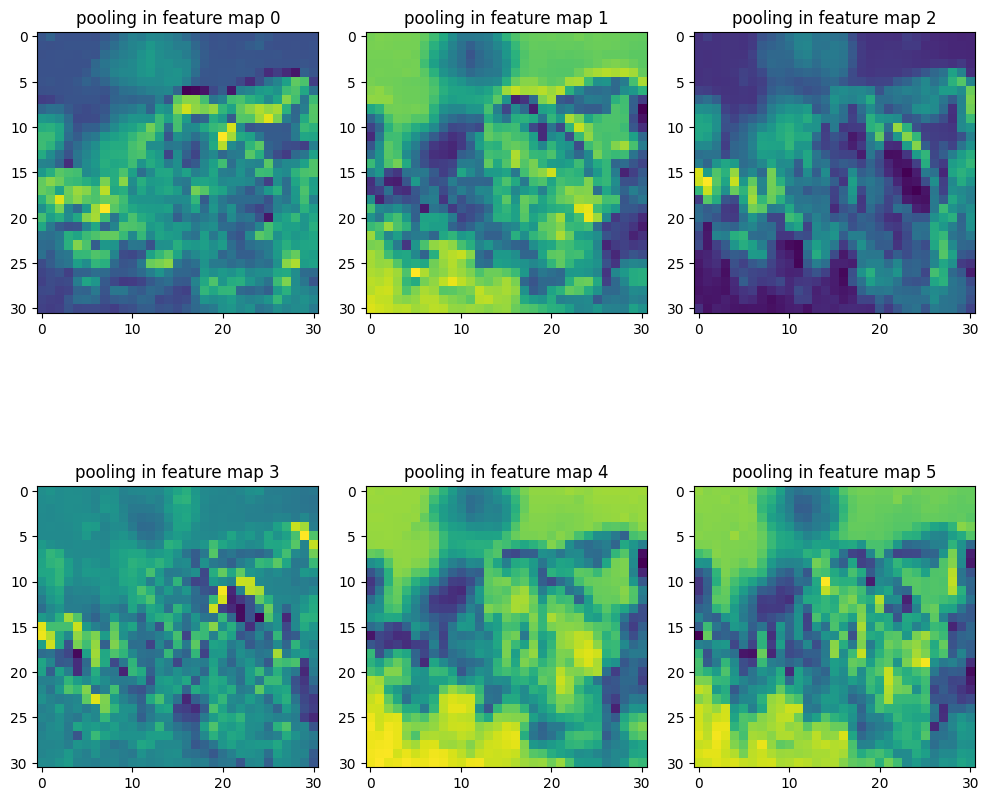

In [173]:
c = 0 
fig, ax = plt.subplots(2,3, figsize=(10,10))

for i in range(2):
    for j in range(3):
        ax[i][j].set_title(f'pooling in feature map {c}')
        ax[i][j].imshow(pool1[c].detach().numpy())
        c += 1
fig.tight_layout()
plt.show()

In [165]:
pool1.shape

torch.Size([6, 31, 31])

In [169]:
# Segunda camada convolucional
segunda_camada_conv = nn.Conv2d(6, 4, 2)
# input_tensor = pool1.unsqueeze(0)
conv2 = segunda_camada_conv(pool1)

In [171]:
conv2.shape

torch.Size([4, 30, 30])

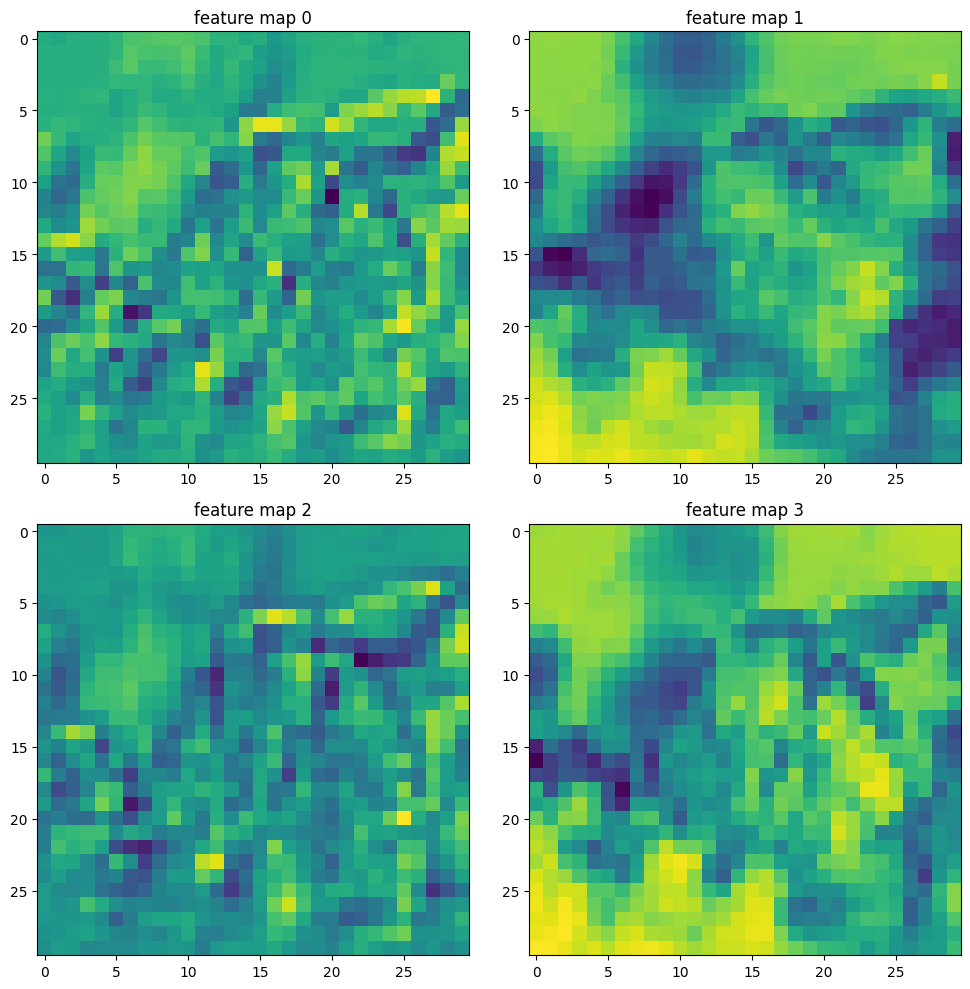

In [177]:
c = 0 
fig, ax = plt.subplots(2,2, figsize=(10,10))

for i in range(2):
    for j in range(2):
        ax[i][j].set_title(f'feature map {c}')
        ax[i][j].imshow(conv2[c].detach().numpy())
        c += 1
fig.tight_layout()
plt.show()

In [176]:
# usando o max pooling pela segunda vez
primeiro_pooling = nn.AvgPool2d(2)
pool2 = primeiro_pooling(conv2)

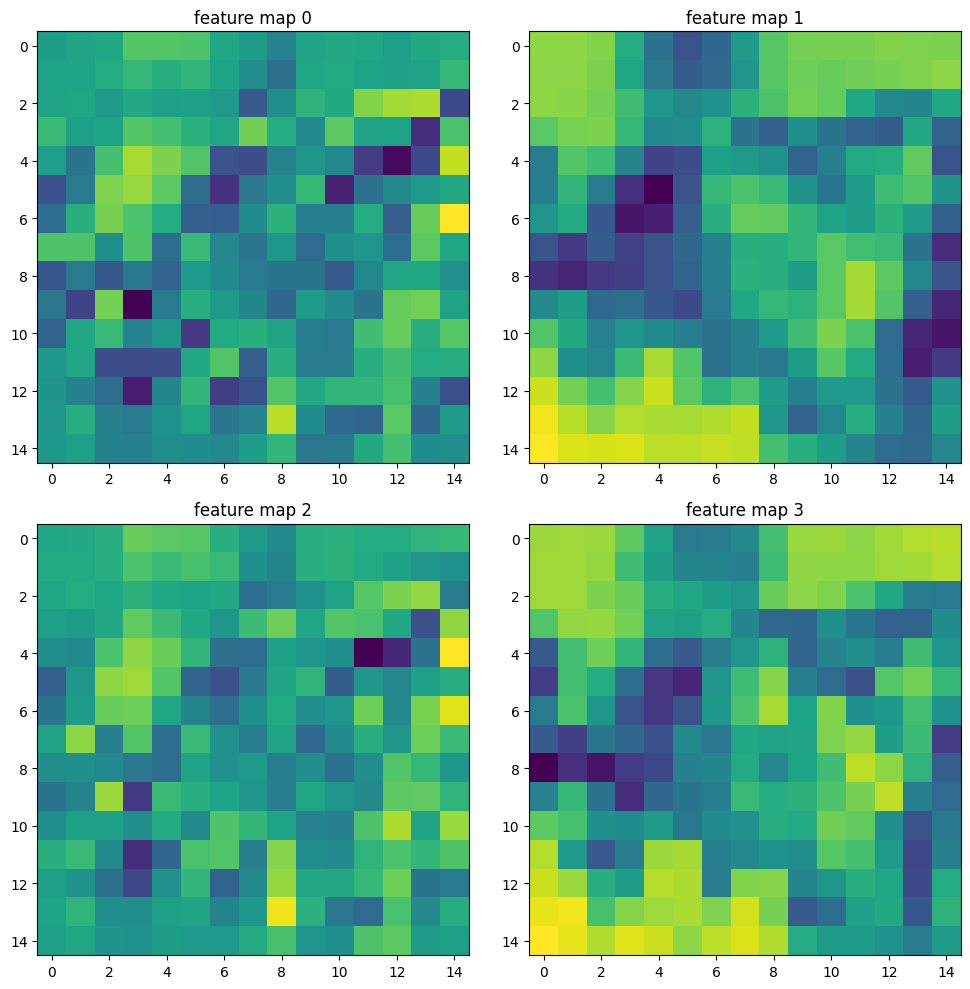

In [178]:
c = 0 
fig, ax = plt.subplots(2,2, figsize=(10,10))

for i in range(2):
    for j in range(2):
        ax[i][j].set_title(f'feature map {c}')
        ax[i][j].imshow(pool2[c].detach().numpy())
        c += 1
fig.tight_layout()
plt.show()

In [179]:
print(f'shape após a 1º conv: {pool2.shape}')

shape após a 1º conv: torch.Size([4, 15, 15])


In [185]:
# Agora usaremos o flatten
flatten_tensor = torch.flatten(pool2)

In [186]:
flatten_tensor.shape

torch.Size([900])

In [188]:
flatten_tensor

tensor([-0.0430, -0.0408, -0.0367, -0.0140, -0.0138, -0.0154, -0.0388, -0.0450,
        -0.0631, -0.0395, -0.0363, -0.0382, -0.0427, -0.0352, -0.0331, -0.0399,
        -0.0403, -0.0340, -0.0256, -0.0311, -0.0267, -0.0400, -0.0554, -0.0762,
        -0.0383, -0.0347, -0.0400, -0.0418, -0.0407, -0.0254, -0.0404, -0.0383,
        -0.0451, -0.0362, -0.0420, -0.0415, -0.0470, -0.0900, -0.0540, -0.0287,
        -0.0351, -0.0009,  0.0082,  0.0107, -0.1008, -0.0234, -0.0419, -0.0399,
        -0.0139, -0.0190, -0.0302, -0.0383, -0.0051, -0.0336, -0.0570, -0.0110,
        -0.0404, -0.0399, -0.1166, -0.0169, -0.0429, -0.0737, -0.0185,  0.0093,
        -0.0018, -0.0147, -0.0953, -0.0984, -0.0625, -0.0493, -0.0591, -0.1094,
        -0.1351, -0.1006,  0.0163, -0.0961, -0.0694, -0.0010,  0.0051, -0.0110,
        -0.0792, -0.1151, -0.0717, -0.0552, -0.0245, -0.1228, -0.0756, -0.0580,
        -0.0468, -0.0361, -0.0783, -0.0306, -0.0035, -0.0163, -0.0343, -0.0868,
        -0.0878, -0.0567, -0.0291, -0.06

In [189]:
15*15*4

900